<a href="https://colab.research.google.com/github/JoaoB97/Applied-Machine-Learning/blob/main/CyberSecurity_Intrustion_Dataset_Joao_Binda_S18105385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

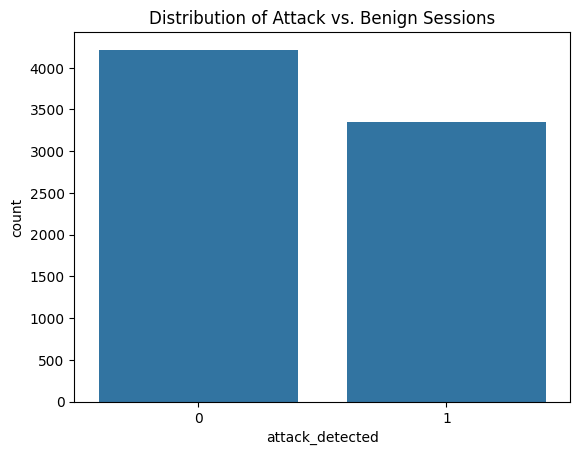

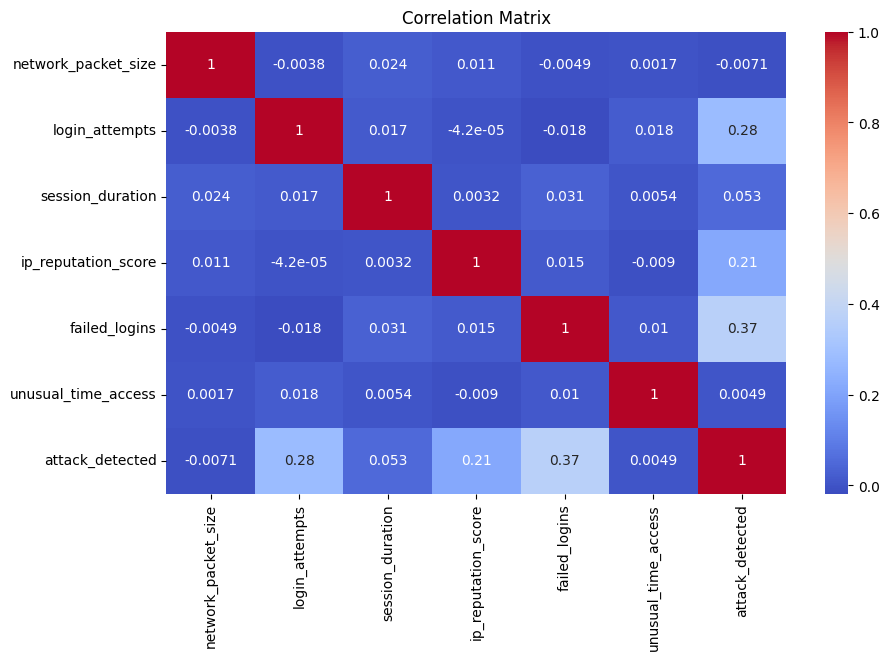

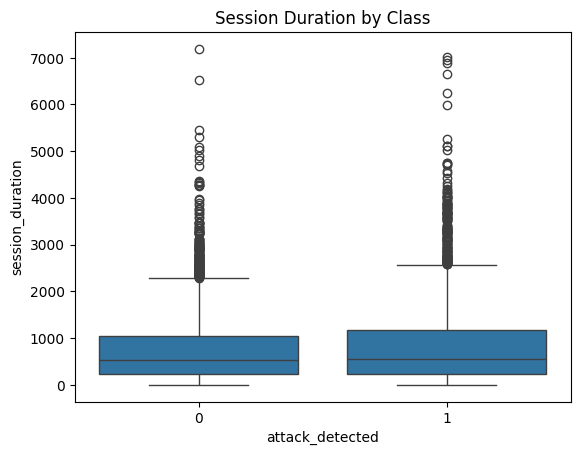

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Drop missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

sns.countplot(x='attack_detected', data=df)
plt.title("Distribution of Attack vs. Benign Sessions")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.boxplot(x='attack_detected', y='session_duration', data=df)
plt.title("Session Duration by Class")
plt.show()


Model: Decision Tree
Accuracy: 0.8249
Precision: 0.8023
Recall: 0.8152
F1 Score: 0.8087
ROC AUC: 0.8241
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1042
           1       0.80      0.82      0.81       866

    accuracy                           0.82      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.83      0.82      0.83      1908


Model: Random Forest
Accuracy: 0.8968
Precision: 0.9956
Recall: 0.776
F1 Score: 0.8722
ROC AUC: 0.8863
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908


Model: Logistic Regression
Accuracy: 0.7453
Precision: 0.748
Recall: 0.6617
F1 Score: 0.

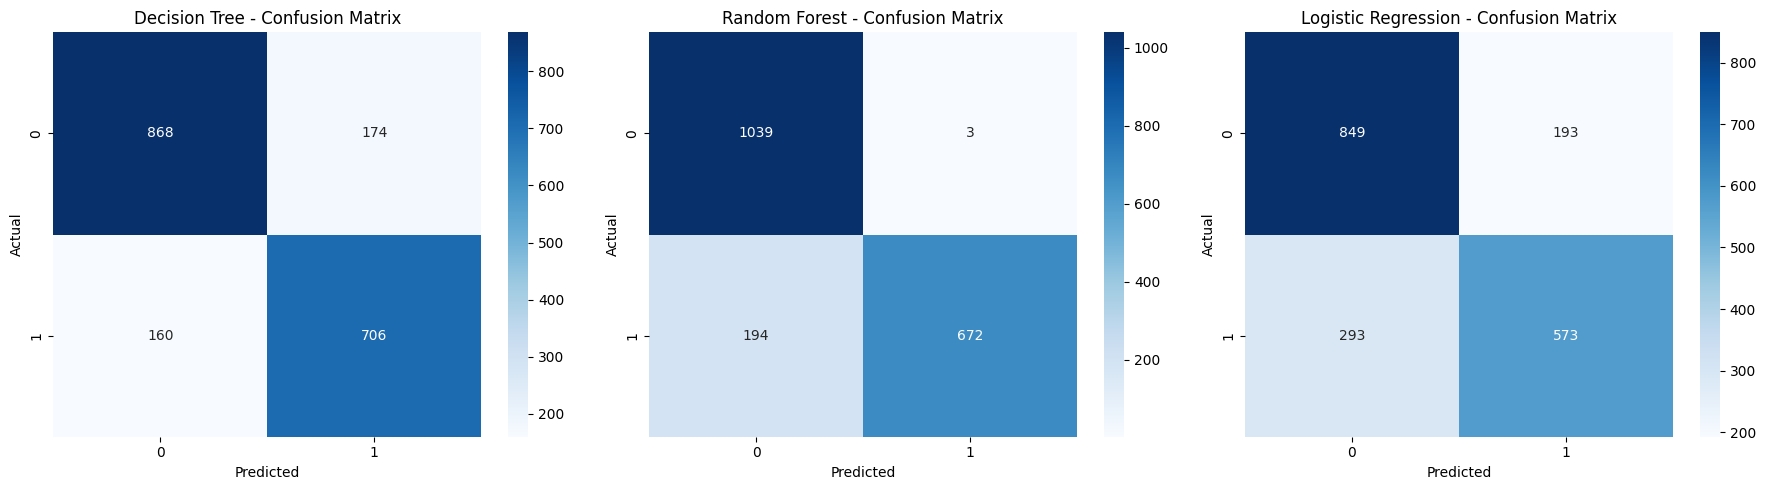

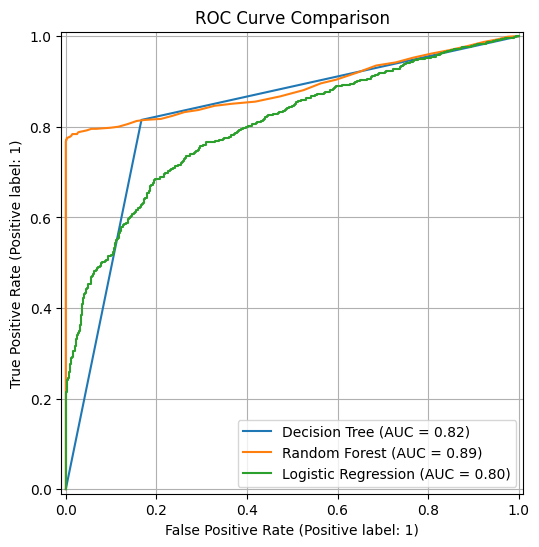

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")

# Drop session_id as it's not useful for prediction
df.drop(columns=["session_id"], inplace=True)

# Encode categorical features
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split into features and target
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred)
    }

# Print metrics
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print("Accuracy:", round(metrics["accuracy"], 4))
    print("Precision:", round(metrics["precision"], 4))
    print("Recall:", round(metrics["recall"], 4))
    print("F1 Score:", round(metrics["f1_score"], 4))
    print("ROC AUC:", round(metrics["roc_auc"], 4))
    print("Classification Report:\n", metrics["classification_report"])

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

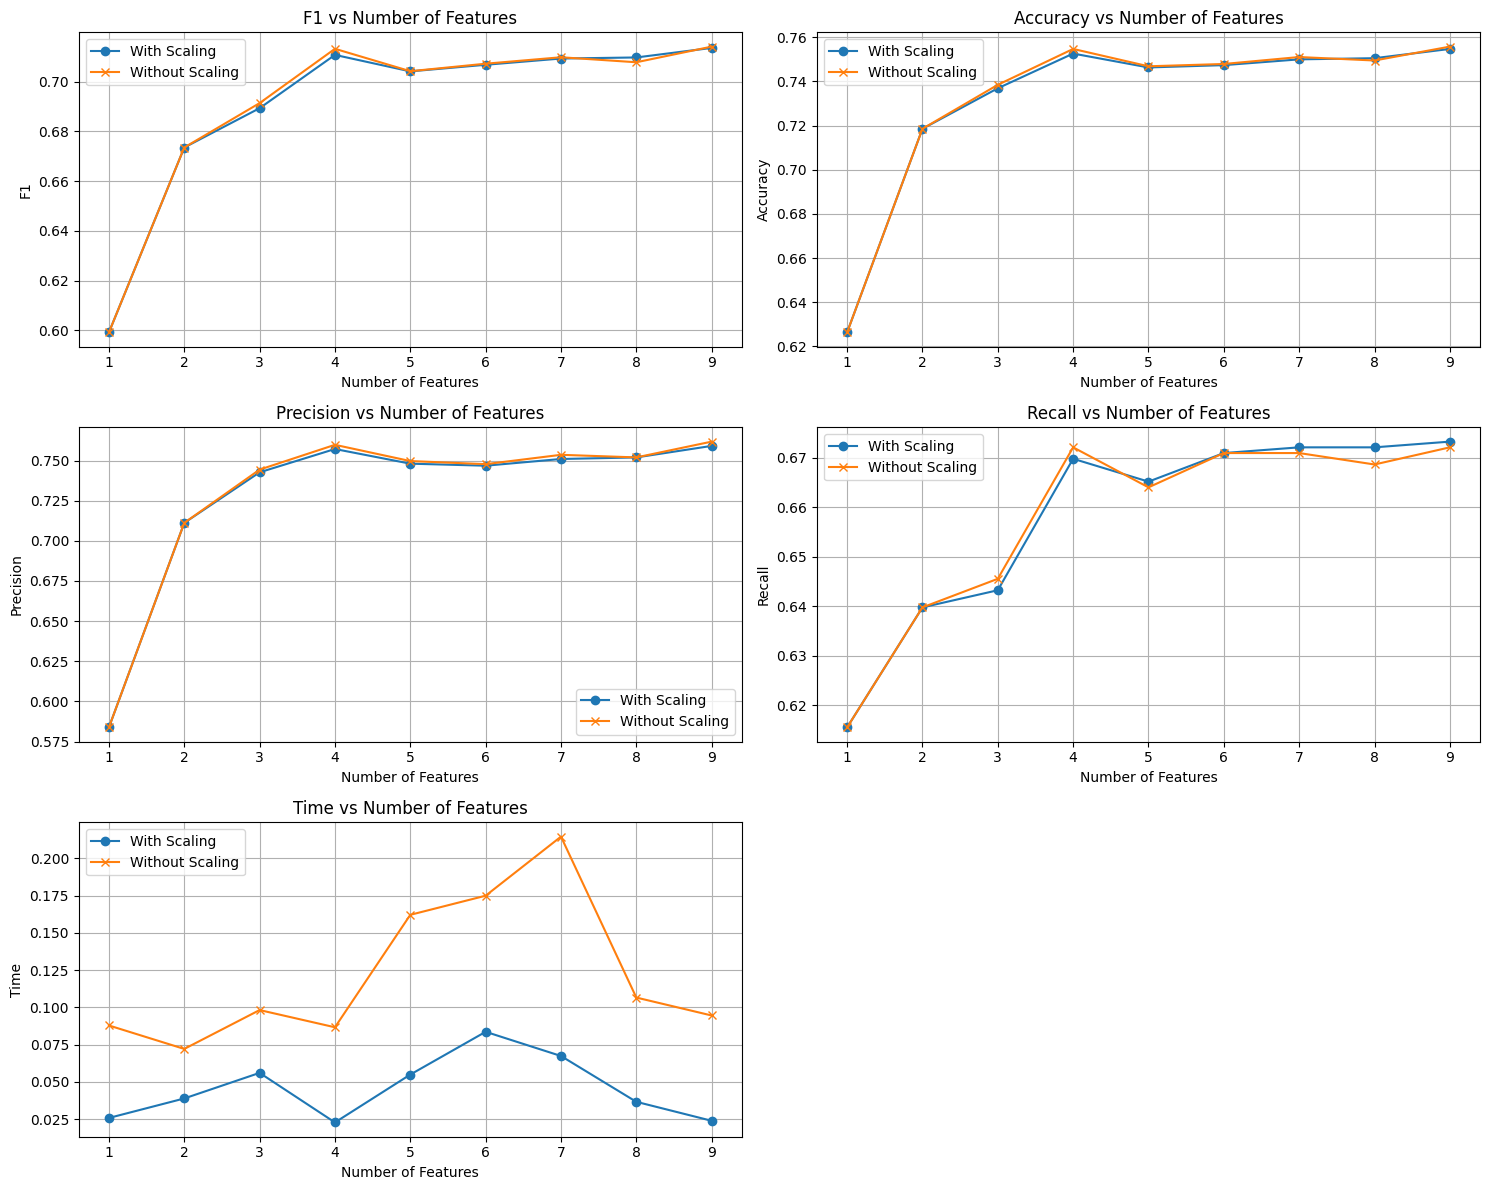

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")

# Drop identifier column
df.drop(columns=["session_id"], inplace=True)

# Separate features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Identify feature types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Initialize metric storage
metrics_with_scaling = {"features": [], "f1": [], "accuracy": [], "precision": [], "recall": [], "time": []}
metrics_without_scaling = {"features": [], "f1": [], "accuracy": [], "precision": [], "recall": [], "time": []}

# Evaluation function
def evaluate_logreg(X_train, X_test, y_train, y_test, scale=True):
    for k in range(1, X_train.shape[1] + 1):
        steps = [("preprocessor", preprocessor),
                 ("feature_selection", SelectKBest(f_classif, k=k))]
        if scale:
            steps.append(("scaler", StandardScaler()))
        steps.append(("classifier", LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')))

        pipeline = Pipeline(steps)

        start = time.time()
        pipeline.fit(X_train, y_train)
        end = time.time()

        y_pred = pipeline.predict(X_test)
        metrics = {
            "features": k,
            "f1": f1_score(y_test, y_pred),
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "time": end - start
        }

        if scale:
            for key in metrics:
                metrics_with_scaling[key].append(metrics[key])
        else:
            for key in metrics:
                metrics_without_scaling[key].append(metrics[key])

# Run both evaluations
evaluate_logreg(X_train, X_test, y_train, y_test, scale=False)
evaluate_logreg(X_train, X_test, y_train, y_test, scale=True)

# Plot results
plt.figure(figsize=(15, 12))
metrics_list = ["f1", "accuracy", "precision", "recall", "time"]
for i, metric in enumerate(metrics_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(metrics_with_scaling["features"], metrics_with_scaling[metric], label="With Scaling", marker='o')
    plt.plot(metrics_without_scaling["features"], metrics_without_scaling[metric], label="Without Scaling", marker='x')
    plt.xlabel("Number of Features")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} vs Number of Features")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

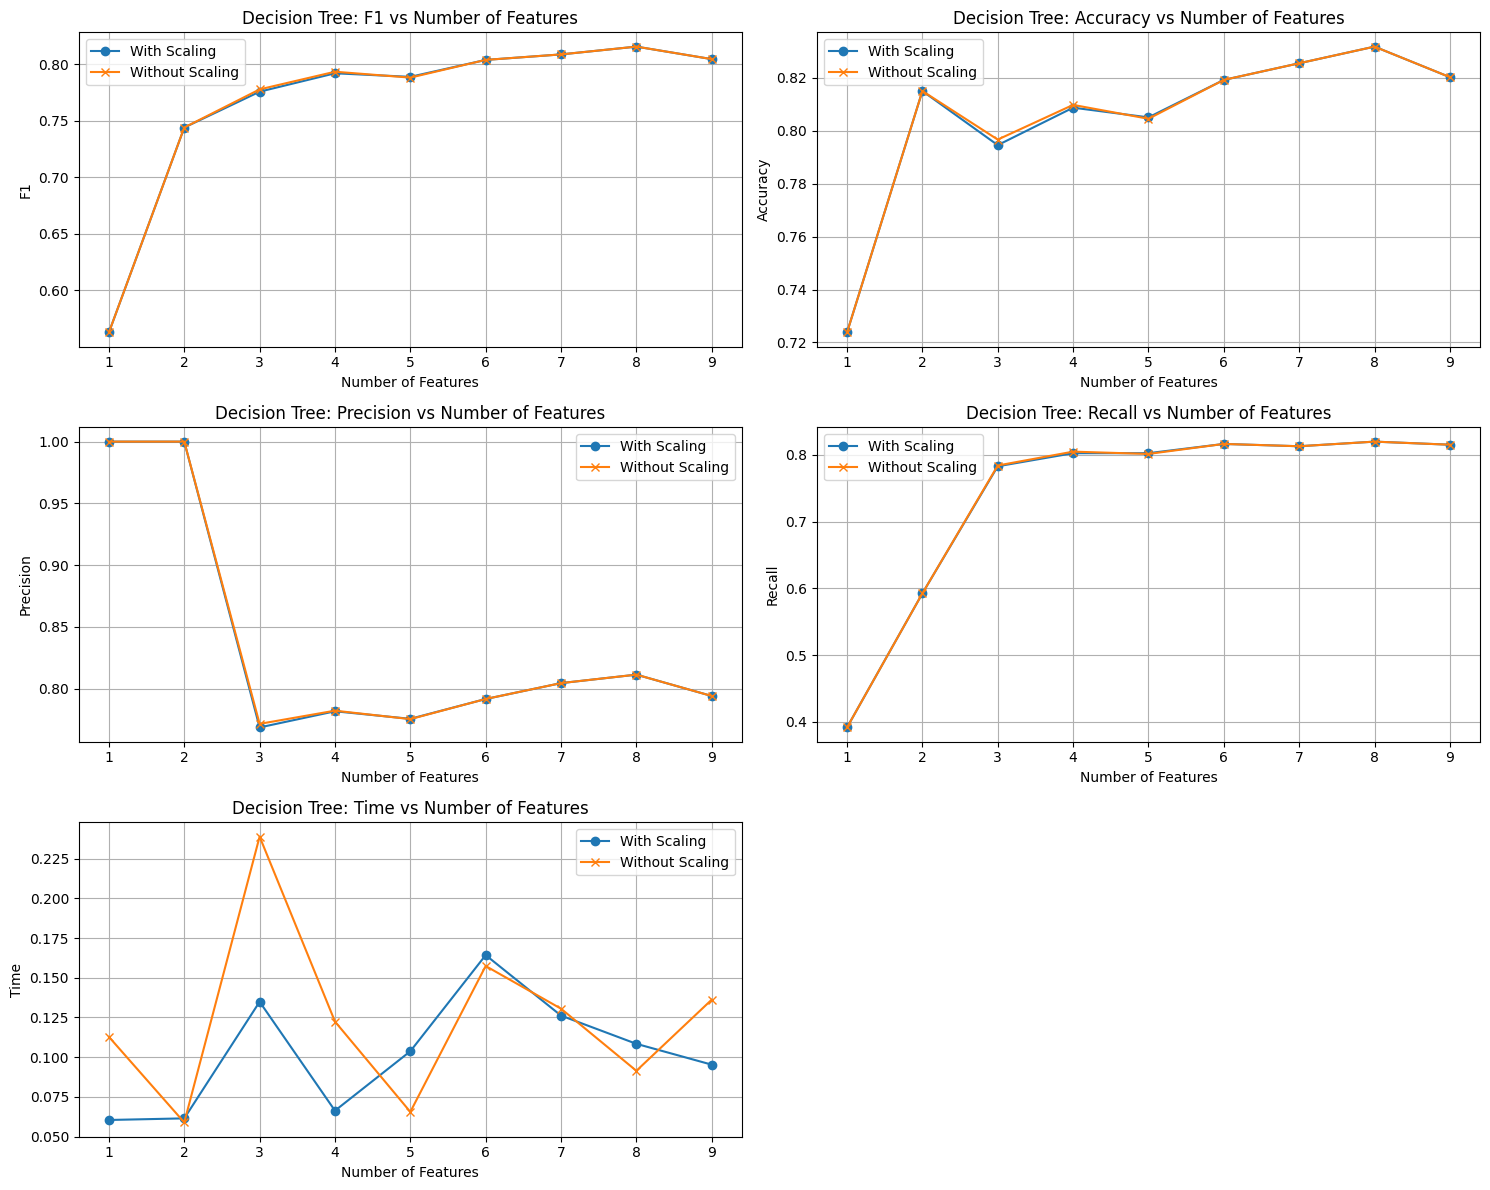

In [ ]:
#Decsion Tree


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")
df.drop(columns=["session_id"], inplace=True)

# Features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Metric storage
dt_metrics_with_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "time"]}
dt_metrics_without_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "time"]}

# Decision Tree evaluation function
def evaluate_decision_tree(X_train, X_test, y_train, y_test, scale=True):
    for k in range(1, X_train.shape[1] + 1):
        steps = [("preprocessor", preprocessor),
                 ("feature_selection", SelectKBest(f_classif, k=k))]
        if scale:
            steps.append(("scaler", StandardScaler()))
        steps.append(("classifier", DecisionTreeClassifier(random_state=42)))

        pipeline = Pipeline(steps)

        start = time.time()
        pipeline.fit(X_train, y_train)
        end = time.time()

        y_pred = pipeline.predict(X_test)

        metrics = {
            "features": k,
            "f1": f1_score(y_test, y_pred),
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "time": end - start
        }

        target = dt_metrics_with_scaling if scale else dt_metrics_without_scaling
        for key in metrics:
            target[key].append(metrics[key])

# Run evaluations
evaluate_decision_tree(X_train, X_test, y_train, y_test, scale=False)
evaluate_decision_tree(X_train, X_test, y_train, y_test, scale=True)

# Plotting results
plt.figure(figsize=(15, 12))
metrics_list = ["f1", "accuracy", "precision", "recall", "time"]
for i, metric in enumerate(metrics_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(dt_metrics_with_scaling["features"], dt_metrics_with_scaling[metric], label="With Scaling", marker='o')
    plt.plot(dt_metrics_without_scaling["features"], dt_metrics_without_scaling[metric], label="Without Scaling", marker='x')
    plt.xlabel("Number of Features")
    plt.ylabel(metric.capitalize())
    plt.title(f"Decision Tree: {metric.capitalize()} vs Number of Features")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

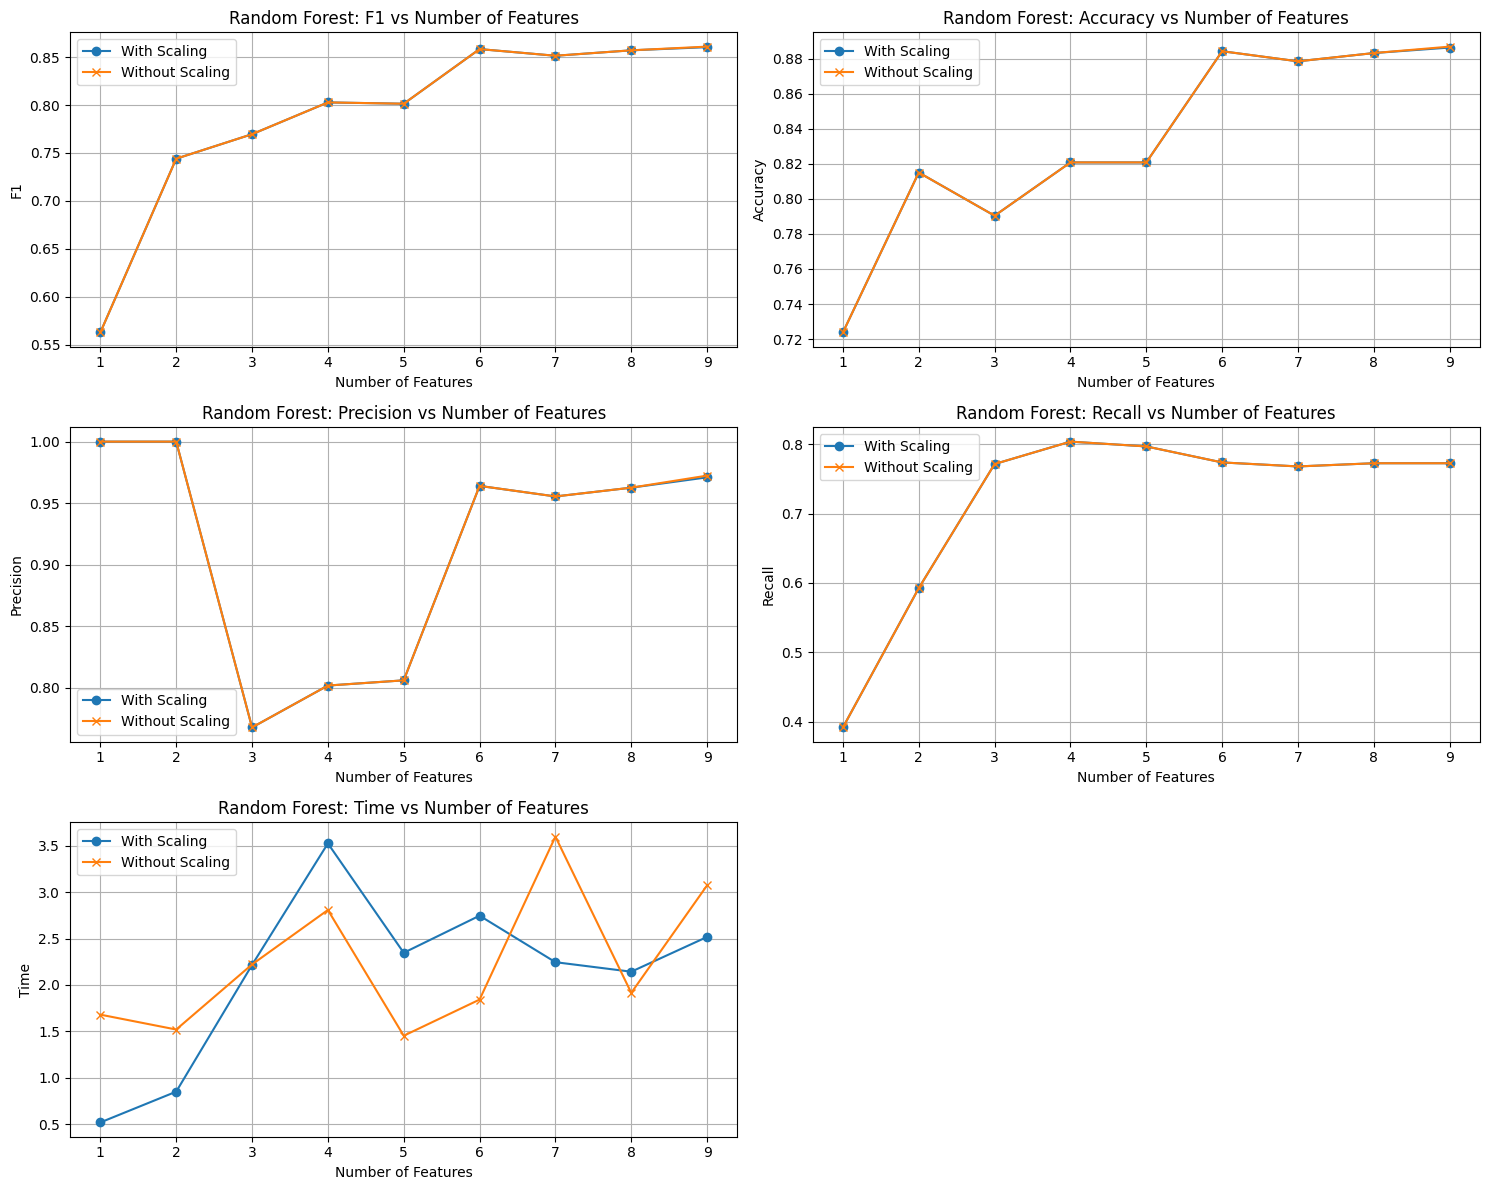

In [ ]:
#Random Forest


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")
df.drop(columns=["session_id"], inplace=True)

# Features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Initialize metric storage
rf_metrics_with_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "time"]}
rf_metrics_without_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "time"]}

# Random Forest evaluation function
def evaluate_random_forest(X_train, X_test, y_train, y_test, scale=True):
    for k in range(1, X_train.shape[1] + 1):
        steps = [("preprocessor", preprocessor),
                 ("feature_selection", SelectKBest(f_classif, k=k))]
        if scale:
            steps.append(("scaler", StandardScaler()))
        steps.append(("classifier", RandomForestClassifier(n_estimators=100, random_state=42)))

        pipeline = Pipeline(steps)

        start = time.time()
        pipeline.fit(X_train, y_train)
        end = time.time()

        y_pred = pipeline.predict(X_test)

        metrics = {
            "features": k,
            "f1": f1_score(y_test, y_pred),
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "time": end - start
        }

        target = rf_metrics_with_scaling if scale else rf_metrics_without_scaling
        for key in metrics:
            target[key].append(metrics[key])

# Run evaluations
evaluate_random_forest(X_train, X_test, y_train, y_test, scale=False)
evaluate_random_forest(X_train, X_test, y_train, y_test, scale=True)

# Plotting results
plt.figure(figsize=(15, 12))
metrics_list = ["f1", "accuracy", "precision", "recall", "time"]
for i, metric in enumerate(metrics_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(rf_metrics_with_scaling["features"], rf_metrics_with_scaling[metric],
             label="With Scaling", marker='o')
    plt.plot(rf_metrics_without_scaling["features"], rf_metrics_without_scaling[metric],
             label="Without Scaling", marker='x')
    plt.xlabel("Number of Features")
    plt.ylabel(metric.capitalize())
    plt.title(f"Random Forest: {metric.capitalize()} vs Number of Features")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

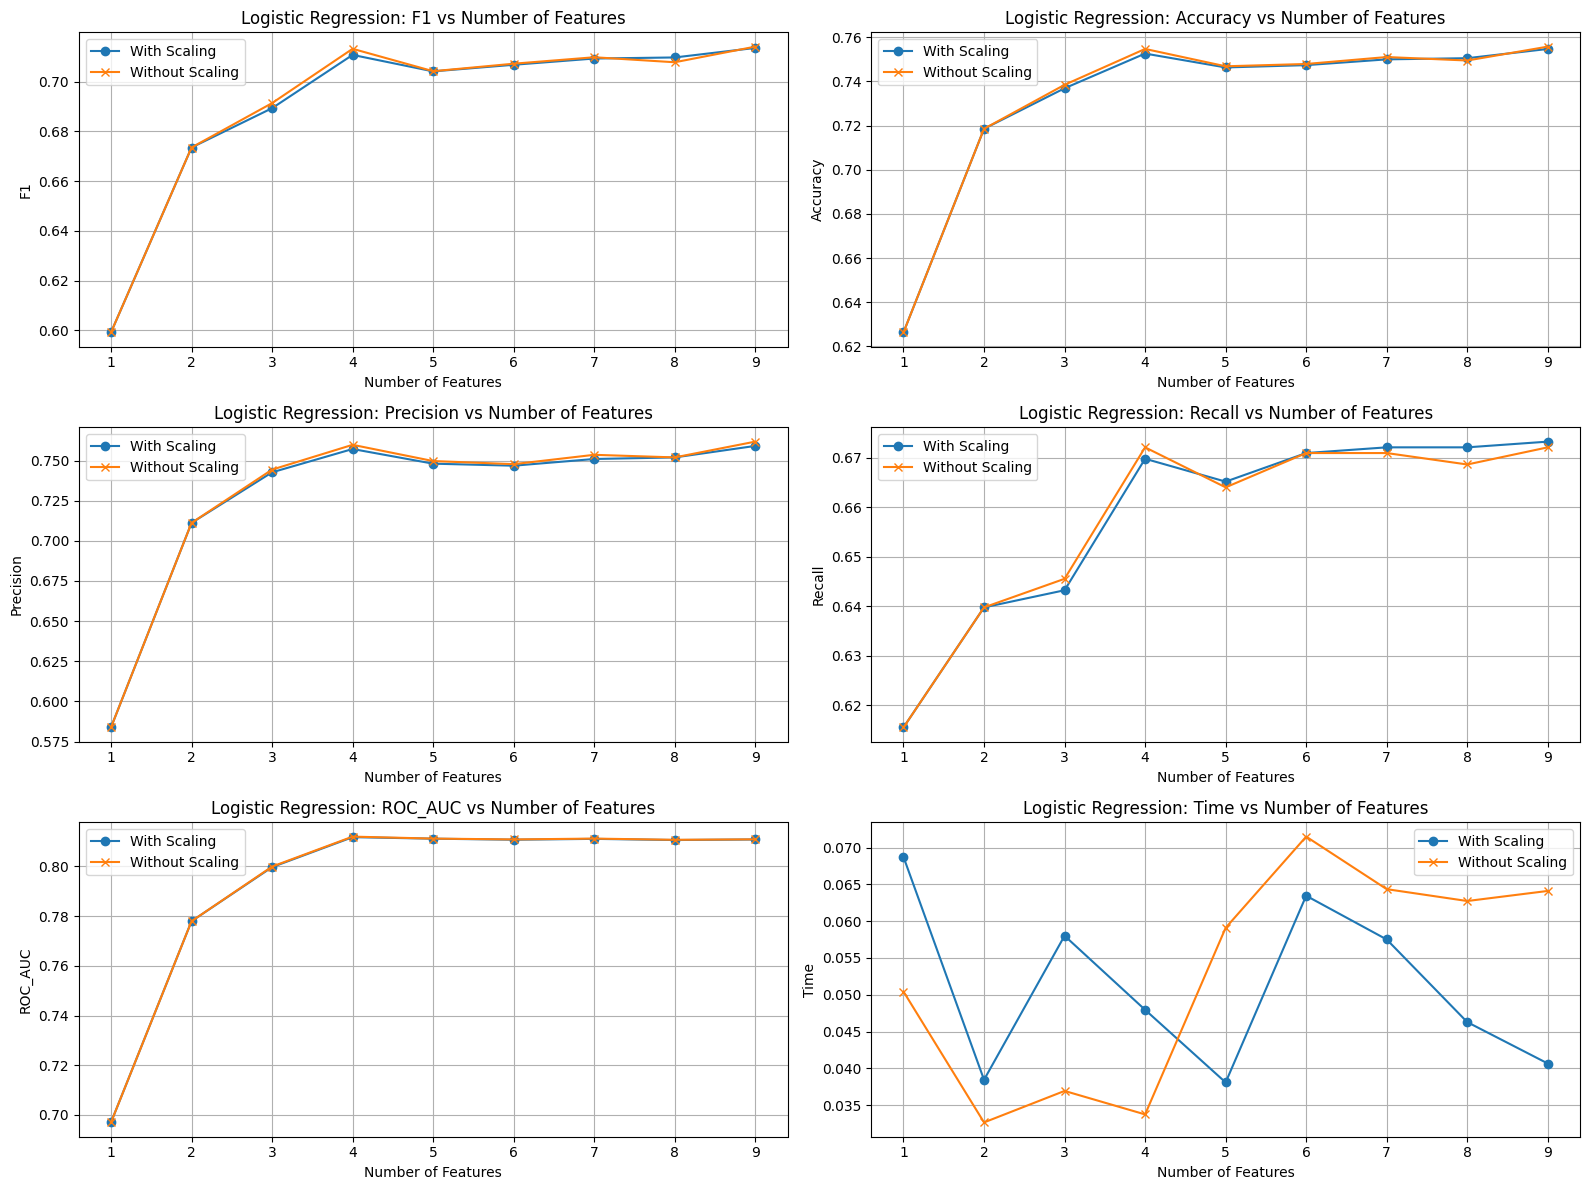

In [1]:
#Logistic Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
)

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")

# Drop identifier column
df.drop(columns=["session_id"], inplace=True)

# Separate features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Initialize metric dictionaries
metrics_with_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "roc_auc", "time"]}
metrics_without_scaling = {m: [] for m in ["features", "f1", "accuracy", "precision", "recall", "roc_auc", "time"]}

# Evaluation function
def evaluate_logreg_with_roc(X_train, X_test, y_train, y_test, scale=True):
    for k in range(1, X_train.shape[1] + 1):
        steps = [("preprocessor", preprocessor),
                 ("feature_selection", SelectKBest(f_classif, k=k))]
        if scale:
            steps.append(("scaler", StandardScaler()))
        steps.append(("classifier", LogisticRegression(
            penalty='l2', max_iter=1000, solver='liblinear')))

        pipeline = Pipeline(steps)

        start = time.time()
        pipeline.fit(X_train, y_train)
        end = time.time()

        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]

        metrics = {
            "features": k,
            "f1": f1_score(y_test, y_pred),
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_prob),
            "time": end - start
        }

        # Save results
        target = metrics_with_scaling if scale else metrics_without_scaling
        for key in metrics:
            target[key].append(metrics[key])

# Run evaluations
evaluate_logreg_with_roc(X_train, X_test, y_train, y_test, scale=False)
evaluate_logreg_with_roc(X_train, X_test, y_train, y_test, scale=True)

# Plotting results
plt.figure(figsize=(16, 12))
metrics_list = ["f1", "accuracy", "precision", "recall", "roc_auc", "time"]
for i, metric in enumerate(metrics_list, 1):
    plt.subplot(3, 2, i)
    plt.plot(metrics_with_scaling["features"], metrics_with_scaling[metric],
             label="With Scaling", marker='o')
    plt.plot(metrics_without_scaling["features"], metrics_without_scaling[metric],
             label="Without Scaling", marker='x')
    plt.xlabel("Number of Features")
    plt.ylabel(metric.upper() if metric == "roc_auc" else metric.capitalize())
    plt.title(f"Logistic Regression: {metric.upper() if metric == 'roc_auc' else metric.capitalize()} vs Number of Features")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Model: Decision Tree
Accuracy: 0.8249
Precision: 0.8023
Recall: 0.8152
F1 Score: 0.8087
ROC AUC: 0.8241
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1042
           1       0.80      0.82      0.81       866

    accuracy                           0.82      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.83      0.82      0.83      1908


Model: Random Forest
Accuracy: 0.8968
Precision: 0.9956
Recall: 0.776
F1 Score: 0.8722
ROC AUC: 0.8863
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908


Model: Logistic Regression
Accuracy: 0.7453
Precision: 0.748
Recall: 0.6617
F1 Score: 0.

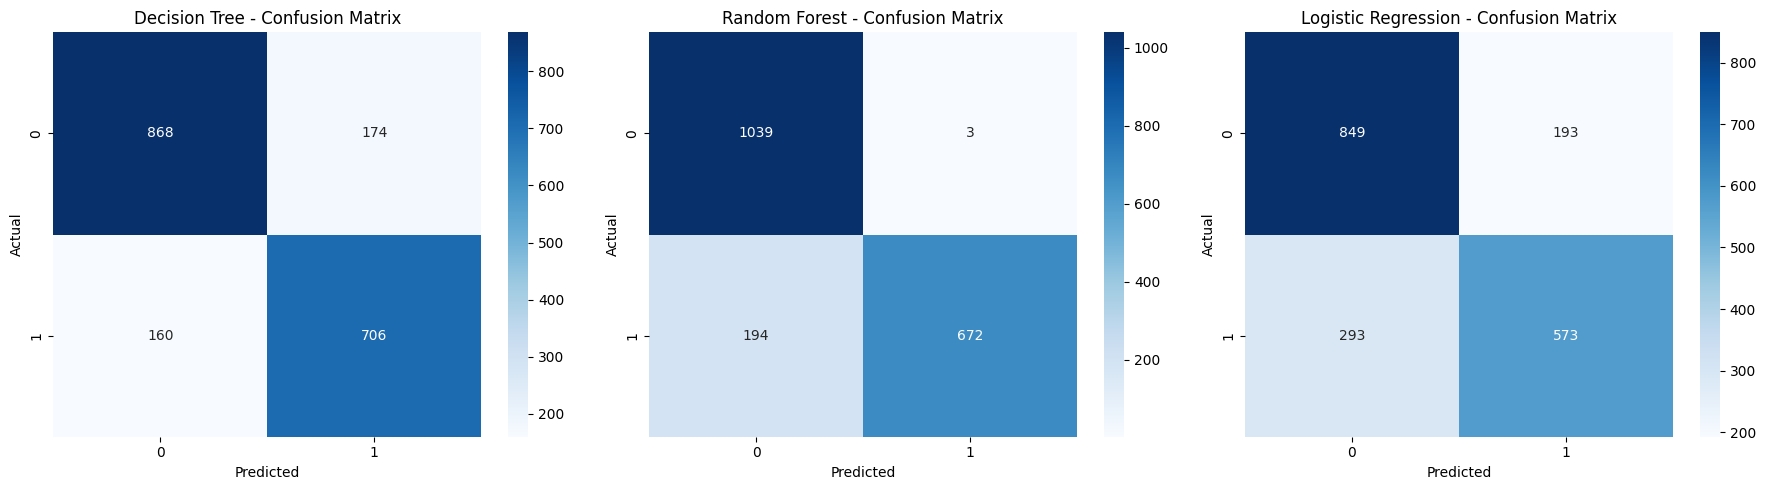

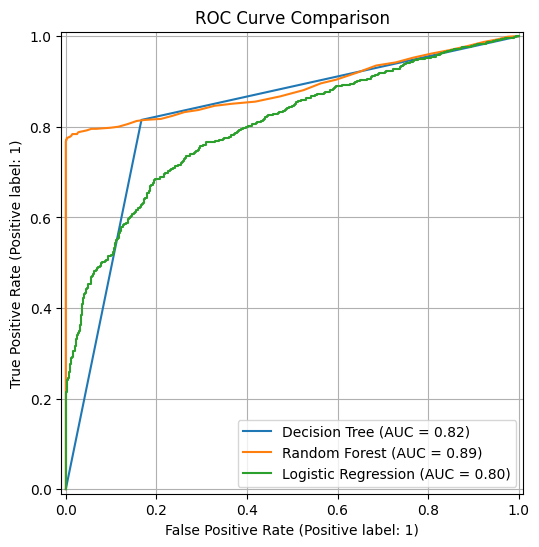

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")

# Drop session_id as it's not useful for prediction
df.drop(columns=["session_id"], inplace=True)

# Encode categorical features
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split into features and target
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred)
    }

# Print metrics
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print("Accuracy:", round(metrics["accuracy"], 4))
    print("Precision:", round(metrics["precision"], 4))
    print("Recall:", round(metrics["recall"], 4))
    print("F1 Score:", round(metrics["f1_score"], 4))
    print("ROC AUC:", round(metrics["roc_auc"], 4))
    print("Classification Report:\n", metrics["classification_report"])

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()
